# Entrega

Se sugiere agregar todas las secciones de código y texto necesarias para implementar y documentar la solución en el mismo notebook. La entrega deberá contener el notebook desarrollado (para descargar el notebook deben ir a Archivo > Descargar > Descargar .ipynb).

Cada equipo deberá subir a webasignatura una única vez el archivo usando el link Entrega Proyecto 1. La fecha límite de entrega es **martes 21 de mayo a las 23:59**.

# Ejercicio: Modulación AM
La modulación AM de un mensaje $x_m(t)$ se basa en la siguiente ecuación:
$$
x_c (t) = A_c(1+\mu x_m(t))\cos(2\pi f_c t),
$$
donde $A_c$ y $\mu$ son la amplitud y el factor de modulación (parámetros) y $f_c$ es la frecuencia de la portadora.

El resultado de la modulación es desplazar el espectro de $x_m(t)$ para llevarlo a la frecuencia $f_c$.

El objetivo de este ejercicio es implementar un modoluador y un demodulador AM. El modulador tomará como entrada el mensaje $x_m(t)$ para generar la señal modulada $x_c(t)$. El demodulador deberá recuperar el mensaje a partir de la señal modulada aplicando la técnica de detector de envolvente.

Para simplificar las operaciones se asumirá que $A_c = 1$ y $\mu = 1$. La frecuencia de la portadora se tomará para todo el ejercicio será $f_c = 100kHz$.

A continuación se especifican las funciones a desarrollar y como cargar el mensaje de audio que se modulará $x_m(t)$.

**Observación** Tenga presente que se implementará una solución digital a un problema contínuo. Para esto deberá elegir adecuadamente la frecuencia de muestreo para que la misma permita capturar sin pérdida todas las frecuencias relevantes del problema contínuo.

In [10]:
def modulador(xm,fc,t):
  #
  # Entradas
  # xm: mensaje a ser modulado
  # fc: frecuencia de la portadora
  # t: vector de tiempos para los que se generará la señal modulada
  #
  # Salidas
  # xc: señal modulada
  #
  # Observación:
  # El vector de tiempos debe ser generado con la frecuencia de muestreo adecuada
  Ac = 1
  mu = 1
  xc = Ac*(1 + mu * xm )*(np.cos(2*np.pi*fc*t))
  return xc

In [11]:
#def demodulador(xc,fc,t):
  #
  # Entradas
  # xc: señal modulada
  # fc: frecuencia de la portadora
  # t: vector de tiempos
  #
  # Salidas
  # xm: mensaje demodulado

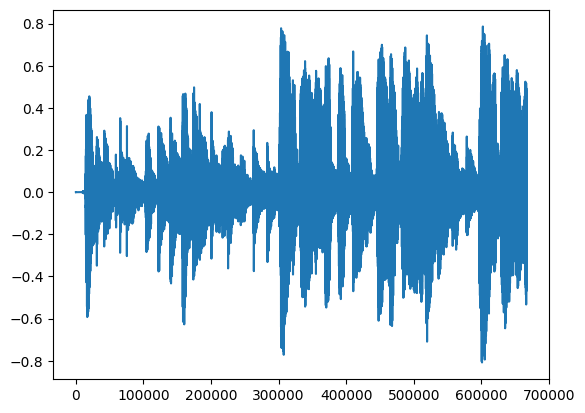

In [12]:
from scipy.io import wavfile

def leeAudio( file_path ):
  # Lectura del archivo .wav
  fs,x = wavfile.read( file_path )

  # Nos quedamos con un canal normalizado entre -1 y 1
  x = x[:,0]/32767.0

  return fs,x


# El archivo mensaje.wav debe subirse llevándola a la carpeta que aparece a la izquierda
fs, x = leeAudio("./mensaje.wav")

# Grafica del mensaje
from matplotlib import pyplot as plt
plt.plot(x)
plt.show()

fc = 100000


In [13]:
# Frecuencia de muestreo para la simulación
fss = (100000 + 22050) * 2

In [14]:
from scipy import signal
import numpy as np

# Datos del mensaje de entrada
print("Muestras: ", x.shape [0], "Fs: ", fs, "Tiempo: ", x.shape[0]/fs)

# Nueva frecuencia de muestreo
fs2 = fss

# Tiempo total del mensaje original
T = x.shape[0] / fs

# Nueva cantidad de muestras
#N2 = fs2 * T
N2 = np.ceil( fs2 * T )

x2 = signal.resample(x,int(N2))

print("Muestras: ", x2.shape[0], "Fs: ", fs2, "Tiempo: ", x2.shape[0]/fs2)

# Vector de tiempos en función del nuevo mensaje
t = np.linspace(0,x2.shape[0],x2.shape[0]) / fs2

Muestras:  667113 Fs:  44100 Tiempo:  15.127278911564625
Muestras:  3692569 Fs:  244100 Tiempo:  15.12727980335928


In [15]:
xc = modulador(x2,100000,t)



In [18]:
# prompt: quiero la misma grafica anterior pero para dos x

import matplotlib.pyplot as plt
import numpy as np
# Transformada de Fourier
X = fft(xc)
N = len(X)
X_mag = 20*np.log10(np.abs(X)/N)
f = np.linspace(-fs2/2,fs2/2,N)
plt.figure()
plt.plot(f,fftshift(X_mag))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title('Espectro de la señal modulada en AM')
plt.show()

# Transformada de Fourier
X2 = fft(x2)
N2 = len(X2)
X2_mag = 20*np.log10(np.abs(X2)/N2)
f2 = np.linspace(-fs2/2,fs2/2,N2)
plt.figure()
plt.plot(f2,fftshift(X2_mag))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.title('Espectro de la señal modulada en AM')
plt.show()



NameError: name 'fft' is not defined